In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.io as io
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
#Set up parameters for the figures..
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 1),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"

In [3]:
mat_rank = io.loadmat('/work/imagingQ/SpatialAttention_Drowsiness/Jagannathan_Neuroimage2018/'
                       'Scripts/mat_files/rank_spindles.mat')

mat_tsanas = io.loadmat('/work/imagingQ/SpatialAttention_Drowsiness/Jagannathan_Neuroimage2018/'
                       'Scripts/mat_files/tsanas_spindles.mat')

mat_devuyst = io.loadmat('/work/imagingQ/SpatialAttention_Drowsiness/Jagannathan_Neuroimage2018/'
                       'Scripts/mat_files/devuyst_spindles.mat')

spindle_sens = mat_rank['sensitivity']
spindle_spec = mat_rank['specificity']
spindle_f1 = mat_rank['f1_score']

spindle_sens = spindle_sens/100
spindle_spec = spindle_spec/100


spindle_sens_rank =[]
spindle_spec_rank =[]
spindle_f1_rank =[]
for numdps in range(0, 8):
    spindle_sens_rank.append(float(spindle_sens[0,numdps]))
    spindle_spec_rank.append(float(spindle_spec[0,numdps]))
    spindle_f1_rank.append(float(spindle_f1[0,numdps]))
    

spindle_sens = mat_tsanas['sensitivity']
spindle_spec = mat_tsanas['specificity']
spindle_f1 = mat_tsanas['f1_score']

spindle_sens = spindle_sens/100
spindle_spec = spindle_spec/100


spindle_sens_tsanas_a7 =[]
spindle_spec_tsanas_a7 =[]
spindle_f1_tsanas_a7 =[]
for numdps in range(0, 8):
    spindle_sens_tsanas_a7.append(float(spindle_sens[0,numdps]))
    spindle_spec_tsanas_a7.append(float(spindle_spec[0,numdps]))
    spindle_f1_tsanas_a7.append(float(spindle_f1[0,numdps]))
    
spindle_sens = mat_devuyst['sensitivity']
spindle_spec = mat_devuyst['specificity']
spindle_f1 = mat_devuyst['f1_score']

spindle_sens = spindle_sens/100
spindle_spec = spindle_spec/100


spindle_sens_devuyst =[]
spindle_spec_devuyst =[]
spindle_f1_devuyst =[]
for numdps in range(0, 8):
    spindle_sens_devuyst.append(float(spindle_sens[0,numdps]))
    spindle_spec_devuyst.append(float(spindle_spec[0,numdps]))
    spindle_f1_devuyst.append(float(spindle_f1[0,numdps]))

(0.2, 1)

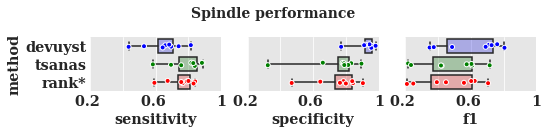

In [4]:
#Spindle databases evaluation..
method = ['devuyst','devuyst','devuyst','devuyst','devuyst','devuyst','devuyst','devuyst',
          'tsanas','tsanas','tsanas','tsanas','tsanas','tsanas','tsanas','tsanas',
          'rank*','rank*','rank*','rank*','rank*','rank*','rank*','rank*']

sensitivity = spindle_sens_devuyst + spindle_sens_tsanas_a7 + spindle_sens_rank
specificity = spindle_spec_devuyst + spindle_spec_tsanas_a7 + spindle_spec_rank
f1 = spindle_f1_devuyst + spindle_f1_tsanas_a7 + spindle_f1_rank

df = pd.DataFrame({'method' : method, 'sensitivity' : sensitivity, 'specificity' : specificity, 
                   'f1' : f1})

medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=1, color='black')

pal = {method: "r" if method == "rank*" else "b" for method in df.method.unique()}
pal['tsanas'] = "g"
# Two subplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
#st = f.suptitle("Spindle performance", size=12, fontweight='bold')
f.text(0.3, 1.2, 'Spindle performance', va='center', fontweight='bold',rotation='horizontal', fontsize=14)
sns.boxplot(x="sensitivity", y="method", data=df, whis=np.inf, ax=ax1,palette=pal,showbox=True,dodge=False, 
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True,
            medianprops=medianprops)
sns.stripplot(x="sensitivity", y="method", data=df,jitter=True, linewidth=1, ax=ax1,palette=pal,
              edgecolor ="white")
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="specificity", y="method", data=df, whis=np.inf, ax=ax2,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True,
            medianprops=medianprops)
sns.stripplot(x="specificity", y="method", data=df,jitter=True, linewidth=1, ax=ax2,palette=pal,
              edgecolor ="white")
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="f1", y="method", data=df, whis=np.inf, ax=ax3,palette=pal,showbox=True, dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True,
            medianprops=medianprops)
sns.stripplot(x="f1", y="method", data=df,jitter=True, linewidth=1, ax=ax3,palette=pal,edgecolor ="white")
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))    
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xticks([0.20,0.40, 0.60,0.80, 1])
ax1.axes.xaxis.set_ticklabels(['0.2 ','','0.6 ','','1'])
ax1.set_xlim(0.2, 1)
ax2.set_xticks([0.20,0.40, 0.60,0.80, 1])
ax2.axes.xaxis.set_ticklabels(['0.2 ','','0.6 ','','1'])
ax2.set_xlim(0.2, 1)
ax3.set_xticks([0.2,0.40, 0.6,0.80, 1])
ax3.axes.xaxis.set_ticklabels(['0.2 ','','0.6 ','','1'])
ax3.set_xlim(0.2, 1)

In [5]:
mat_peak = io.loadmat('/work/imagingQ/SpatialAttention_Drowsiness/Jagannathan_Neuroimage2018/'
                       'Scripts/mat_files/peak_kcomp.mat')

mat_devuyst = io.loadmat('/work/imagingQ/SpatialAttention_Drowsiness/Jagannathan_Neuroimage2018/'
                       'Scripts/mat_files/devuyst_kcomp.mat')

kcomp_sens = mat_peak['sensitivity']
kcomp_spec = mat_peak['specificity']
kcomp_f1 = mat_peak['f1_score']

kcomp_sens = kcomp_sens/100
kcomp_spec = kcomp_spec/100


kcomp_sens_peak =[]
kcomp_spec_peak =[]
kcomp_f1_peak =[]
for numdps in range(0, 5):
    kcomp_sens_peak.append(float(kcomp_sens[0,numdps]))
    kcomp_spec_peak.append(float(kcomp_spec[0,numdps]))
    kcomp_f1_peak.append(float(kcomp_f1[0,numdps]))
    

kcomp_sens = mat_devuyst['sensitivity']
kcomp_spec = mat_devuyst['specificity']
kcomp_f1 = mat_devuyst['f1_score']

kcomp_sens = kcomp_sens/100
kcomp_spec = kcomp_spec/100


kcomp_sens_devuyst =[]
kcomp_spec_devuyst =[]
kcomp_f1_devuyst =[]
for numdps in range(0, 5):
    kcomp_sens_devuyst.append(float(kcomp_sens[0,numdps]))
    kcomp_spec_devuyst.append(float(kcomp_spec[0,numdps]))
    kcomp_f1_devuyst.append(float(kcomp_f1[0,numdps]))

(0.2, 1)

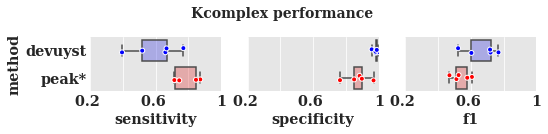

In [6]:
method = ['devuyst','devuyst','devuyst','devuyst','devuyst',
          'peak*','peak*','peak*','peak*','peak*']

sensitivity = kcomp_sens_devuyst + kcomp_sens_peak
specificity = kcomp_spec_devuyst + kcomp_spec_peak
f1 = kcomp_f1_devuyst + kcomp_f1_peak 
df = pd.DataFrame({'method' : method, 'sensitivity' : sensitivity, 'specificity' : specificity, 
                   'f1' : f1})
pal['peak*'] = "r"


f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
f.text(0.3, 1.2, 'Kcomplex performance', va='center', fontweight='bold',rotation='horizontal', fontsize=14)

sns.boxplot(x="sensitivity", y="method", data=df, whis=np.inf, ax=ax1,palette=pal,showbox=True,dodge=False, 
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True,
            medianprops=medianprops)
sns.stripplot(x="sensitivity", y="method", data=df,jitter=True, linewidth=1, ax=ax1,palette=pal,
              edgecolor ="white")
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="specificity", y="method", data=df, whis=np.inf, ax=ax2,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True,
            medianprops=medianprops)
sns.stripplot(x="specificity", y="method", data=df,jitter=True, linewidth=1, ax=ax2,palette=pal,
              edgecolor ="white")
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="f1", y="method", data=df, whis=np.inf, ax=ax3,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True,
            medianprops=medianprops)
sns.stripplot(x="f1", y="method", data=df,jitter=True, linewidth=1, ax=ax3,palette=pal,edgecolor ="white")
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))    
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xticks([0.20,0.40, 0.60, 0.80, 1])
ax1.axes.xaxis.set_ticklabels(['0.2 ','','0.6 ','','1'])
ax1.set_xlim(0.2, 1)
ax2.set_xticks([0.20,0.40, 0.60,0.80, 1])
ax2.axes.xaxis.set_ticklabels(['0.2 ','','0.6 ','','1'])
ax2.set_xlim(0.2, 1)
ax3.set_xticks([0.2,0.40, 0.6,0.80, 1])
ax3.axes.xaxis.set_ticklabels(['0.2 ','','0.6 ','','1'])
ax3.set_xlim(0.2, 1)